In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ts = pd.read_csv("timeseries.csv")

In [5]:
ts.head()

,Unnamed: 0,Attack,Model,Dataset,TrainRegularAccuracy,TrainAdversarialAccuracy,ValRegularAccuracy,ValAdversarialAccuracy
0,0,PGD_inf_0.1,FCN,UCR_Wine,0.473684,0.473684,0.500000,0.500000
1,1,PGD_inf_0.1,ShapeletNet,UCR_Wine,0.807018,0.385965,0.592593,0.222222
2,2,PGD_inf_0.1,resnet,UCR_Wine,0.543860,0.385965,0.444444,0.333333
3,3,PGD_inf_0.1,MLP,UCR_Wine,1.000000,0.736842,0.851852,0.592593


In [6]:
acc_df = []
modes = ["ValRegularAccuracy", "ValAdversarialAccuracy"]

for i, row in ts.iterrows():
    for mode in modes:
        new_row = {}
        new_row["Dataset"] = row["Dataset"]
        new_row["Model"] = row["Model"]
        new_row["Type"] = mode
        new_row["Accuracy"] = row[mode]
        acc_df.append(new_row)
acc_df = pd.DataFrame.from_records(acc_df)

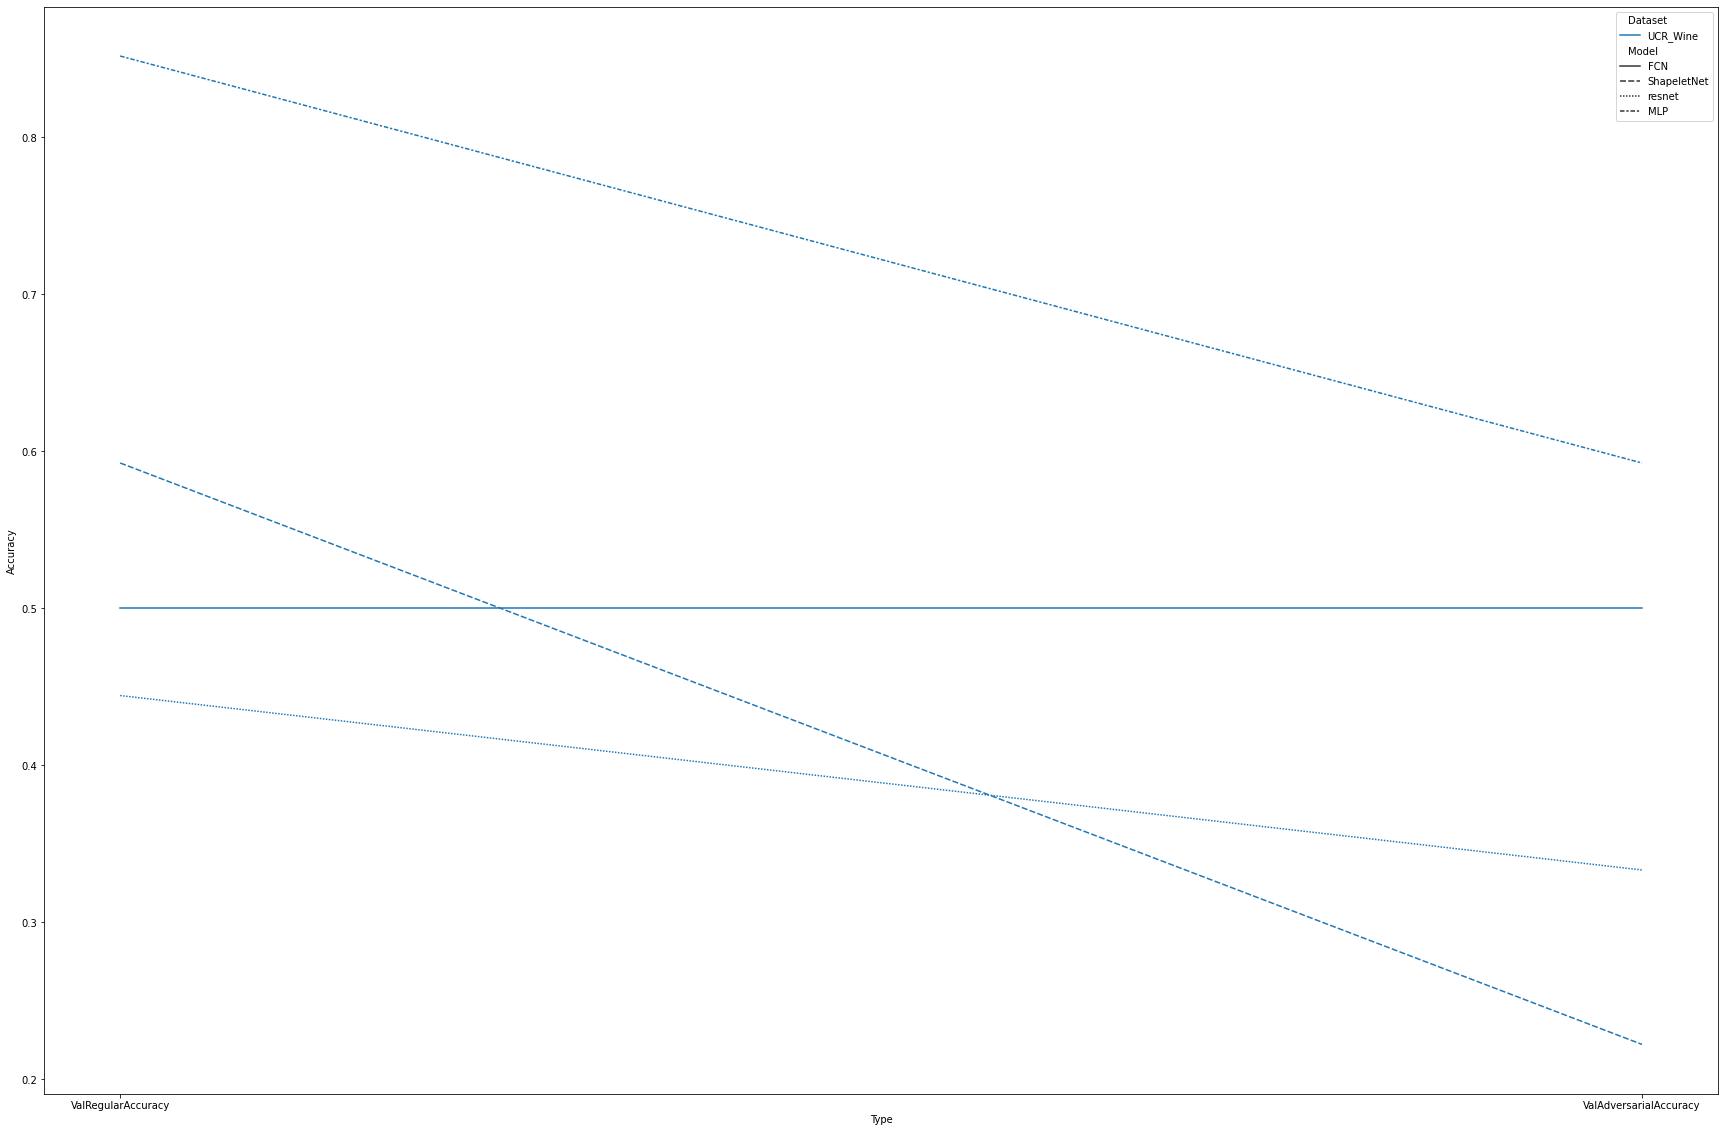

In [7]:
fig, axs = plt.subplots(1,1, figsize=(30,20))
sns.lineplot(x="Type", y="Accuracy", style="Model", hue="Dataset", data=acc_df, sort=False, ax=axs)
fig.savefig("./initial_results.png")

In [8]:
piv = ts.pivot(columns="Model", index="Dataset", values=["ValRegularAccuracy", "ValAdversarialAccuracy"])

In [9]:
piv

ValRegularAccuracy                                  \
Model                   FCN       MLP ShapeletNet    resnet   
Dataset                                                       
UCR_Wine                0.5  0.851852    0.592593  0.444444   

         ValAdversarialAccuracy                                  
Model                       FCN       MLP ShapeletNet    resnet  
Dataset                                                          
UCR_Wine                    0.5  0.592593    0.222222  0.333333

<AxesSubplot:xlabel='None-Model', ylabel='Dataset'>

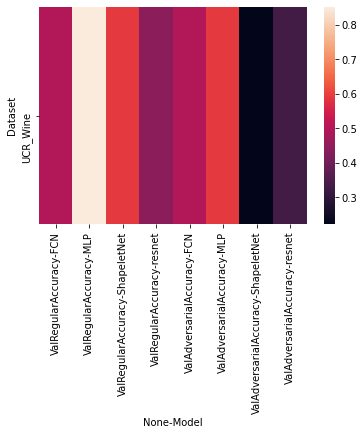

In [10]:
sns.heatmap(data=piv)